![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/55482509-12ad2480-55fb-11e9-9bca-ea2281b69c27.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Neural Network

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

In [3]:
sns.set_palette('Paired')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [4]:
df = pd.read_csv('data/cleaned_dataset_3.csv', index_col='customerID')

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.850,False,1,0,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.950,False,0,1,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,True,0,1,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.300,False,0,1,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.700,True,1,0,0,1,0,1,0,0,0,0,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Split dataset into train and test partitions

In [5]:
# Labels
y = df['Churn']

# Features
X = df.drop(columns=['Churn'])

### Sparse `y` values

From `y = [0, 1, 1, ...]` to `Y = [[1,0], [0,1], [0,1], ...]`.

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
Y[0:5]

array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5634, 26) (5634, 2)
(1409, 26) (1409, 2)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Create our Neural Network classification model

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(10, input_shape=(X.shape[1],), activation='tanh'))
model.add(Dense(6, activation='tanh'))

model.add(Dense(Y.shape[1], activation='softmax'))

Using TensorFlow backend.


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.metrics_names)

model.summary()

['loss', 'acc']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 350
Trainable params: 350
Non-trainable params: 0
_________________________________________________________________


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Fitting the model and predicting

In [10]:
batch_size = 32
epochs = 20

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 5634 samples, validate on 1409 samples
Epoch 1/20
5634/5634 [==============================] - 0s 55us/step - loss: 0.5679 - acc: 0.7022 - val_loss: 0.4910 - val_acc: 0.7530
Epoch 2/20
5634/5634 [==============================] - 0s 28us/step - loss: 0.4920 - acc: 0.7300 - val_loss: 0.4594 - val_acc: 0.7530
Epoch 3/20
5634/5634 [==============================] - 0s 28us/step - loss: 0.4734 - acc: 0.7593 - val_loss: 0.4507 - val_acc: 0.7630
Epoch 4/20
5634/5634 [==============================] - 0s 27us/step - loss: 0.4571 - acc: 0.7794 - val_loss: 0.4237 - val_acc: 0.8105
Epoch 5/20
5634/5634 [==============================] - 0s 28us/step - loss: 0.4462 - acc: 0.7900 - val_loss: 0.4316 - val_acc: 0.7807
Epoch 6/20
5634/5634 [==============================] - 0s 32us/step - loss: 0.4398 - acc: 0.7952 - val_loss: 0.4204 - val_acc: 0.7984
Epoch 7/20
5634/5634 [==============================] - 0s 28us/step - loss: 0.4316 - acc: 0.7994 - val_loss: 0.4044 - val_acc: 0.8098
Epoch 8

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Evaluate the model

And let's see how the model performs. Two values will be returned:

- Loss (a number which represents our error, lower values are better)
- Accuracy

In [11]:
score = model.evaluate(X_test,
                       Y_test,
                       batch_size=batch_size,
                       verbose=1)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

1409/1409 [==============================] - 0s 34us/step
Test loss: 0.402
Test accuracy: 0.8


In [12]:
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test_class, Y_pred_class))
print(confusion_matrix(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1061
           1       0.60      0.59      0.59       348

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409

[[922 139]
 [143 205]]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Create a graph of accuracy and loss over time

`model.fit()` returns a History object that contains a dictionary with everything that happened during training:

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

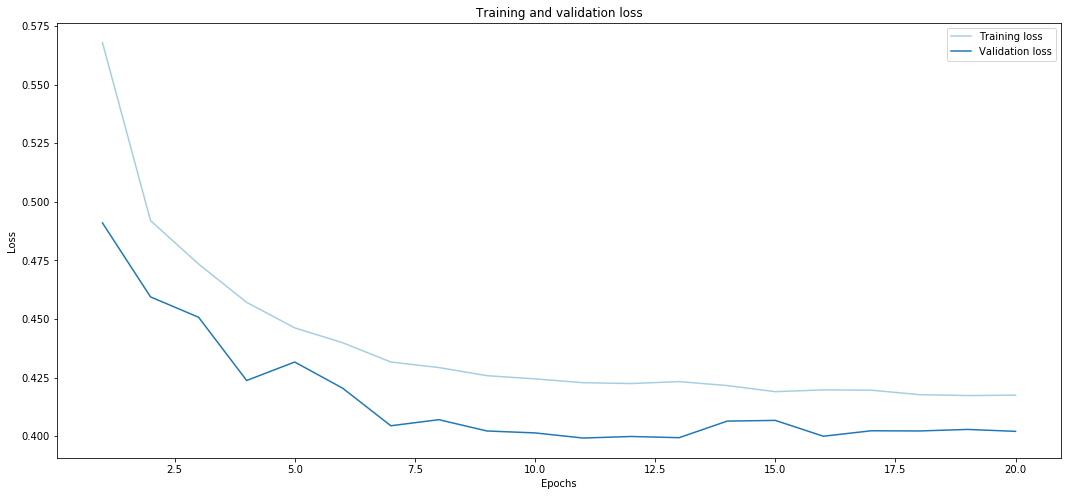

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(18,8))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

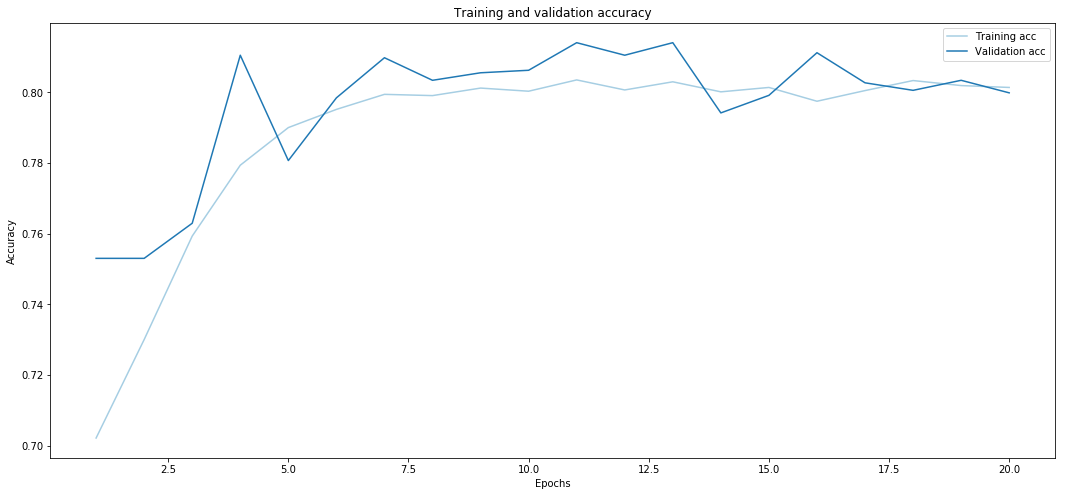

In [15]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.figure(figsize=(18,8))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)